<div style = "text-align: left"><font size = 8 color = "#B22222" face = "verdana"><b>Integrify</b></font></div>
<div style = "text-align: left"><font size = 6 color = "#00008B" face = "verdana"><b>Home work_2</b></font></div>

#### import libraries

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Data Ingestion

In [17]:
data_df = pd.read_excel('integrify_data/Group4.xlsx')
data_df.head()
                        

,S1,S2,S3
0,499.0,322.0,382.0
1,493.0,331.0,375.0
2,501.0,319.0,391.0
3,502.0,330.0,380.0
4,486.0,333.0,372.0


#### Covariance of the three variables S1 S2 S3

In [20]:
data_df.cov()

,S1,S2,S3
S1,244.786050,-2.948224,84.388746
S2,-2.948224,368.950956,-43.226885
S3,84.388746,-43.226885,341.582173


#### Correlation Coefficient between the three coefficient S1 S2 S3

In [22]:
data_df.corr()

,S1,S2,S3
S1,1.000000,-0.009810,0.291839
S2,-0.009810,1.000000,-0.121765
S3,0.291839,-0.121765,1.000000


#### Plot of the relationship between the variables S1, S2, S3

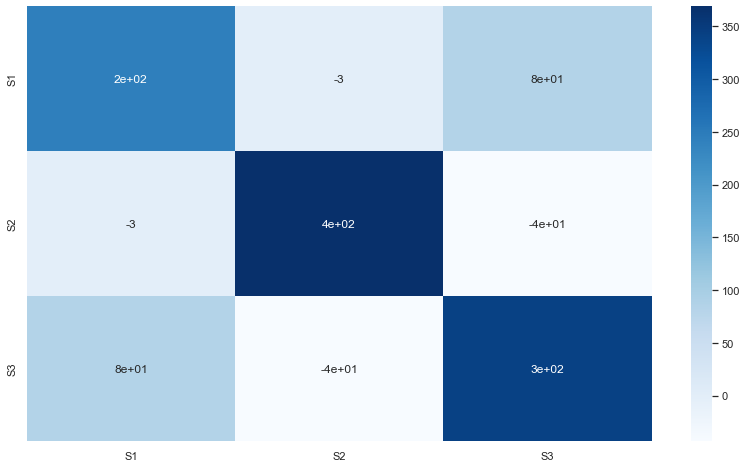

In [63]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
cov = data_df.cov()
heatmap = sns.heatmap(cov, annot=True, cmap="Blues", fmt='.1g')

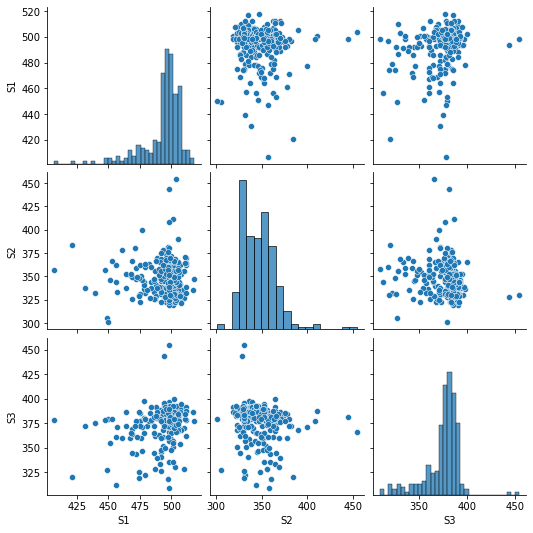

In [26]:
sns.pairplot(data_df);

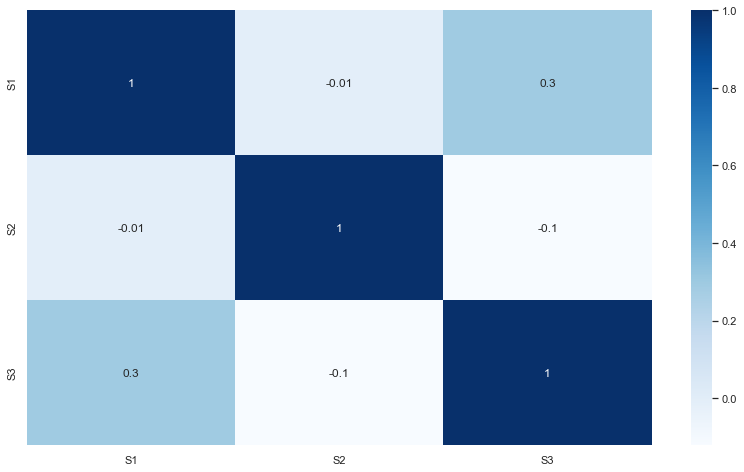

In [32]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = data_df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

#### To Generate a random sample of 50 observations for each sensor

In [35]:
sample_data_df = data_df.sample(50)
print(f"The shape of the sample data: {sample_data_df.shape}")
sample_data_df.head(2)

The shape of the sample data: (50, 3)


,S1,S2,S3
91,512.0,332.0,362.0
204,453.0,366.0,379.0


In [37]:
s1 = data_df['S1'].sample(50)
s2 = data_df['S2'].sample(50)
s3 = np.random.choice(data_df['S3'] ,50 , replace=False)

#### Confifence level [90%, 95%, 99%]

In [39]:
# dictionary of z-values and its corresponding confidence level
pctage_zvalue_dict = {'90%':1.64, '95%':1.96, '99%':2.58}
pctage_zvalue_dict

{'90%': 1.64, '95%': 1.96, '99%': 2.58}

In [53]:
Z_value =list(pctage_zvalue_dict.values())
mean_s1_s2_s3 = [np.mean(s1), np.mean(s2), np.mean(s3)]
std_s1_s2_s3 = [np.std(s1), np.std(s2), np.std(s3)]

print(Z_value)
print(mean_s1_s2_s3)
print(std_s1_s2_s3)

[1.64, 1.96, 2.58]
[492.68, 348.04, 374.82]
[13.716326038702933, 22.772755652314018, 18.16115635084947]


In [56]:
LCL = []
UCL = []

for i in range(3):
    LCL_s = []
    UCL_s = []
    for j in range(3):
        LCL_s.append(mean_s1_s2_s3[i]-Z_value[j]*(std_s1_s2_s3[i]/np.sqrt(50)))
        UCL_s.append(mean_s1_s2_s3[i]+Z_value[j]*(std_s1_s2_s3[i]/np.sqrt(50)))
    LCL.append(LCL_s)
    UCL.append(UCL_s)    
    
print(LCL)
print(UCL)                                                

[[489.4987584531822, 488.8780283952665, 487.67536390805486], [342.7582914570378, 341.7277141803622, 339.73097070680336], [370.60786440636105, 369.7859842905291, 368.1935915661046]]
[[495.86124154681784, 496.48197160473353, 497.68463609194515], [353.32170854296226, 354.3522858196378, 356.3490292931967], [379.03213559363894, 379.8540157094709, 381.4464084338954]]


In [60]:
sample_mean = [np.mean(s1), np.mean(s2), np.mean(s3)]
population_mean = [np.mean(data_df['S1']), np.mean(data_df['S2']), np.mean(data_df['S3'])]
print("sample_mean : ",sample_mean)
print("population_mean : ",population_mean)

sample_mean :  [492.68, 348.04, 374.82]
population_mean :  [493.3157894736842, 347.246963562753, 374.914979757085]
